### Variational Inference

Let us begin with Bayes' rule

$$
p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) = \frac{p \left(\mathbf{t} | \mathbf{f} \right)p \left( \mathbf{f} | \mathbf{X} \right) }{p \left( \mathbf{t} | \mathbf{X} \right) }
$$

where assuming a Gaussian likelihood and Gaussian noise model, we have

$$
\textrm{Likelihood}: p \left(\mathbf{t} | \mathbf{f} \right) = \mathcal{N} \left( \mathbf{f} , \sigma^2 \mathbf{I} \right)
$$

$$
\textrm{Prior}: p \left( \mathbf{f} | \mathbf{X} \right) = \mathcal{N} \left( \mathbf{0}, \mathbf{K} \right)
$$

$$
\textrm{Posterior}: p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) = \mathcal{N} \left( \boldsymbol{\mu}, \boldsymbol{\Sigma} \right)
$$

$$
\textrm{Marginal likelihood (or evidence)}: p \left( \mathbf{t} | \mathbf{X} \right) 
$$

where

$$
\boldsymbol{\mu} = \mathbf{K}\left( \mathbf{X}, \mathbf{X}' \right) \left[ \mathbf{K}\left( \mathbf{X} , \mathbf{X}' \right)  + \sigma^2 \mathbf{I} \right]^{-1} \mathbf{t}
$$

and

$$
\boldsymbol{\Sigma} = \mathbf{K}\left( \mathbf{X} , \mathbf{X}' \right) - \mathbf{K}\left( \mathbf{X}_{\ast}, \mathbf{X} \right) \left[ \mathbf{K}\left( \mathbf{X} , \mathbf{X}' \right)  + \sigma^2 \mathbf{I} \right]^{-1} \mathbf{K}^{T}\left( \mathbf{X} , \mathbf{X}' \right) 
$$

For non-Gaussian likelihoods, one cannot express the posterior in terms of the mean and covariance terms above. Thus, we require a strategy to do so without having to resort to Markov Chain Monte Carlo. For Gaussian likelihoods, as we have already established, the closed-form posterior above requires inverting a matrix of size $N \times N$ where $N$ corresponds to the number of training data points. 

The objective of variational inference is to approximate the exact posterior by introducing a variational distribution, $q \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)$. One seeks to minimize the Kullback-Leibler divergence between the exact and variational distribution. This is given by

$$
KL \left[ \underbrace{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)}_{\textrm{approximate posterior}} || \underbrace{p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)}_{\textrm{true posterior}} \right]
$$

Using the definition of the KL divergence, this may be re-written as

$$
\begin{aligned}
KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] & = \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; \frac{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)}{p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \right]
\end{aligned}
$$

Now using Bayes' rule, we have


$$
\begin{aligned}
KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] & = \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; \frac{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)}{\frac{p \left(\mathbf{t} | \mathbf{f} \right)p \left( \mathbf{f} | \mathbf{X} \right) }{p \left( \mathbf{t} | \mathbf{X} \right) }} \right]
\end{aligned}
$$


$$
\begin{aligned}
KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] & = \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)\right] - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left(\mathbf{t} | \mathbf{f} \right)p \left( \mathbf{f} | \mathbf{X} \right)  \right] + \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left( \mathbf{t} | \mathbf{X} \right) \right]
\end{aligned}
$$


$$
\begin{aligned}
KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] & = \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)\right] - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left(\mathbf{t} | \mathbf{f} \right) \right] - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log p \left( \mathbf{f} | \mathbf{X} \right)  \right] + \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left( \mathbf{t} | \mathbf{X} \right) \right]
\end{aligned}
$$


$$
\begin{aligned}
KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] & = \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; \frac{ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)}{ p \left( \mathbf{f} | \mathbf{X} \right)} \right] - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left(\mathbf{t} | \mathbf{f} \right) \right] + \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left( \mathbf{t} | \mathbf{X} \right) \right]
\end{aligned}
$$


So, we can express the expectation of the marginal likelihood as

$$
\begin{aligned}
KL \left[  q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) ||  p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] & = KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}\right) \right]  - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left(\mathbf{t} | \mathbf{f} \right) \right] + \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left( \mathbf{t} | \mathbf{X} \right) \right] \\
KL \left[  q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) ||  p \left( \mathbf{f} | \mathbf{X} , \mathbf{t}\right) \right] & = KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X} \right) \right]  - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left(\mathbf{t} | \mathbf{f} \right) \right]  + log \; p \left( \mathbf{t} | \mathbf{X} \right) \\ 
KL \left[  q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) ||  p \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) \right] &  =  log \; p \left( \mathbf{t} | \mathbf{X} \right) + \underbrace{KL \left[ q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) || p \left( \mathbf{f} | \mathbf{X}\right) \right]  - \mathbb{E}_{q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right)} \left[ log \; p \left(\mathbf{t} | \mathbf{f} \right) \right]}_{-ELBO} \\
KL \left[  q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) ||  p \left( \mathbf{f} | \mathbf{X} , \mathbf{t}\right) \right] &  = log \; p \left( \mathbf{t} | \mathbf{X} \right) - ELBO \left( \phi \right)\\
\end{aligned}
$$

Note that the expectation of the marginal likelihood is the expectation of a constant -- i.e., it does not change when any variational parameters change -- resulting in the $log \; p \left( \mathbf{t} | \mathbf{X} \right)$ term above sans the expectation. The **ELBO** acronym above is short for evidence lower bound. It poses a lower bound to the log marginal likelihood, i.e.,

$$
\begin{aligned}
ELBO \left( \phi \right) & = log \; p \left( \mathbf{t} | \mathbf{X} \right)  - KL \left[  q_{\phi} \left( \mathbf{f} | \mathbf{X}, \mathbf{t} \right) ||  p \left( \mathbf{f} | \mathbf{X} \right) \right]
\end{aligned}
$$

As the KL divergence is non-negative, we can write

$$
\begin{aligned}
ELBO \left( \phi \right) & \leq log \; p \left( \mathbf{t} | \mathbf{X} \right) 
\end{aligned}
$$

If we maximize the ELBO, for a fixed marginal likelihood, we are minimizing the KL divergence between the true posterior and its approximation. In other words, we need to compute:

1. The KL divergence between the prior and the approximate posterior
2. The integral of the likelihood with the approximate prior (expectation term above)

For the latter, this approach requires factorizing the likelihood to avoid a $N$-dimensional integral. 

## GP sample continued

In [3]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import seaborn as sns

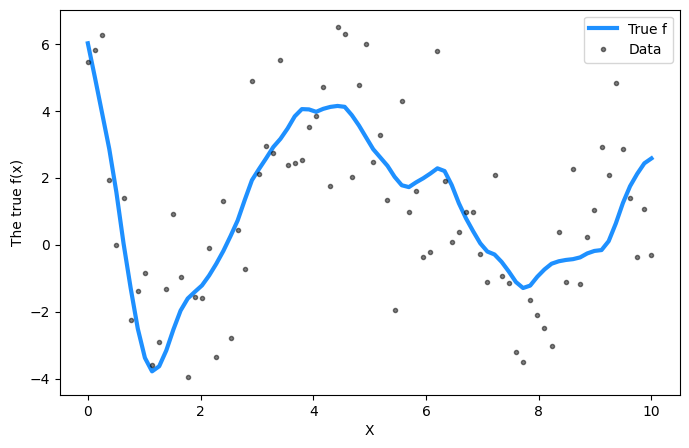

In [4]:
# Training data
n = 80 
X = np.linspace(0, 10, n)[:, None]  

# Define the true covariance function and its parameters
ell_true = 1.0
eta_true = 3.0
cov_func = eta_true**2 * pm.gp.cov.Matern52(1, ell_true)
mean_func = pm.gp.mean.Zero()
f_true = np.random.multivariate_normal(
    mean_func(X).eval(), cov_func(X).eval() + 1e-8 * np.eye(n), 1
).flatten()
sigma_true = 2.0

# True signal is corrupted by random noise
y = f_true + sigma_true * np.random.randn(n)

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(8, 5))
ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f")
ax.plot(X, y, "ok", ms=3, alpha=0.5, label="Data")
ax.set_xlabel("X")
ax.set_ylabel("The true f(x)")
plt.legend();

In [5]:
with pm.Model() as model:
    ell = pm.Gamma("ell", alpha=2, beta=1)
    eta = pm.HalfCauchy("eta", beta=5)

    cov = eta**2 * pm.gp.cov.Matern52(1, ell)
    gp = pm.gp.Marginal(cov_func=cov)

    sigma = pm.HalfCauchy("sigma", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, sigma=sigma)

In [6]:
with model:
    vi = pm.fit(method='advi')

Finished [100%]: Average Loss = 179.46


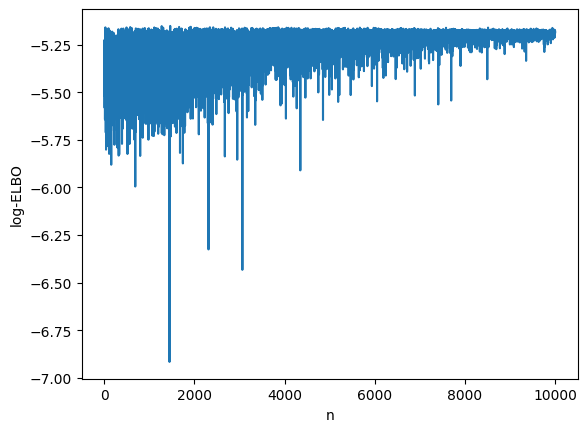

In [21]:
vi_elbo = pd.DataFrame(
    {'log-ELBO': -np.log(vi.hist),
     'n': np.arange(vi.hist.shape[0])})

_ = sns.lineplot(y='log-ELBO', x='n', data=vi_elbo)

In [26]:
# Test values
X_new = np.linspace(0, 20, 600)[:, None]

advi_trace = vi.sample(10000)

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

with model:
    pred_samples = pm.sample_posterior_predictive(
        advi_trace.sel(draw=slice(0, 50)), var_names=["f_pred"] # using 50 samples from the chain
    )

Sampling: [f_pred]


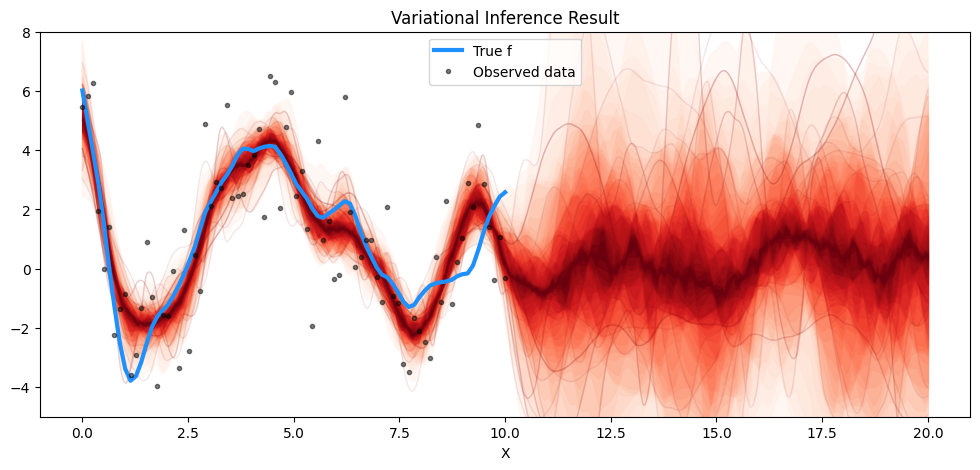

In [28]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc.gp.util import plot_gp_dist

f_pred_samples = az.extract(pred_samples, group="posterior_predictive", var_names=["f_pred"])
plot_gp_dist(ax, samples=f_pred_samples.T, x=X_new)

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f")
plt.plot(X, y, "ok", ms=3, alpha=0.5, label="Observed data")

# axis labels and title
plt.xlabel("X")
plt.ylim([-5, 8])
plt.title("Variational Inference Result")
plt.legend();